# Data Description
- Major League Baseball Data from the 1986 and 1987 seasons.
- There are 322 rows, with 59 rows of missing values. 263 left.
- The response variable is `Salary`, which is the 1987 annual salary in thousands of dollars.
- There are 20 variables:
    - AtBat: Number of times at bat in 1986
    - Hits: Number of hits in 1986
    - HmRun: Number of home runs in 1986
    - Runs: Number of runs in 1986
    - RBI: Number of runs batted in in 1986
    - Walks: Number of walks in 1986
    - Years: Number of years in the major leagues
    - CAtBat: Number of times at bat during his career
    - CHits: Number of hits during his career
    - CHmRun: Number of home runs during his career
    - CRuns: Number of runs during his career
    - CRBI: Number of runs batted in during his career
    - CWalks: Number of walks during his career
    - League: A factor with levels A and N indicating player’s league at the end of 1986
    - Division: A factor with levels E and W indicating player’s division at the end of 1986
    - PutOuts: Number of put outs in 1986
    - Assists: Number of assists in 1986
    - Errors: Number of errors in 1986
    - Salary: 1987 annual salary on opening day in thousands of dollars
    - NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987


# Load Packages and Data

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import \
     (ModelSpec as MS, Stepwise,
      sklearn_selected, sklearn_selection_path)
from l0bnb import fit_path
from functools import partial

In [2]:
Hitters = load_data('Hitters'); print(Hitters.shape); Hitters.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
Hitters.describe().round(1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,263.0
mean,380.9,101.0,10.8,50.9,48.0,38.7,7.4,2648.7,717.6,69.5,358.8,330.1,260.2,288.9,106.9,8.0,535.9
std,153.4,46.5,8.7,26.0,26.2,21.6,4.9,2324.2,654.5,86.3,334.1,333.2,267.1,280.7,136.9,6.4,451.1
min,16.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,67.5
25%,255.2,64.0,4.0,30.2,28.0,22.0,4.0,816.8,209.0,14.0,100.2,88.8,67.2,109.2,7.0,3.0,190.0
50%,379.5,96.0,8.0,48.0,44.0,35.0,6.0,1928.0,508.0,37.5,247.0,220.5,170.5,212.0,39.5,6.0,425.0
75%,512.0,137.0,16.0,69.0,64.8,53.0,11.0,3924.2,1059.2,90.0,526.2,426.2,339.2,325.0,166.0,11.0,750.0
max,687.0,238.0,40.0,130.0,121.0,105.0,24.0,14053.0,4256.0,548.0,2165.0,1659.0,1566.0,1378.0,492.0,32.0,2460.0


In [4]:
np.isnan(Hitters['Salary']).sum()

59

In [5]:
Hitters = Hitters.dropna(); Hitters.shape

(263, 20)

# Subset Selection Methods
## Forward Selection
- We predict a baseball player’s `Salary` on the basis of various statistics associated with performance in the previous year.

In [6]:
# Create a data frame with the predictors
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
X = design.transform(Hitters)
print(X.shape)
X.head()

(263, 20)


,intercept,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
1,1.0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1.0,1.0,632,43,10,1.0
2,1.0,479,130,18,66,72,76,3,1624,457,63,224,266,263,0.0,1.0,880,82,14,0.0
3,1.0,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1.0,0.0,200,11,3,1.0
4,1.0,321,87,10,39,42,30,2,396,101,12,48,46,33,1.0,0.0,805,40,4,1.0
5,1.0,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0.0,1.0,282,421,25,0.0


- We define the search strategy with `Stepwise()` from `ISLP.models`:
    - `Stepwise.first_peak()` continues until no score improvement is found.
    - `Stepwise.fixed_steps()` runs a set number of steps.

In [7]:
strategy = Stepwise.first_peak(design, direction='forward', 
                               max_terms=len(design.terms))

- We use forward selection with `sklearn_selected()` from `ISLP.models` to fit a linear regression model.
- This function uses a `statsmodels` model and a search strategy.
- This function has a default scoring of MSE.
- Note: the method `fit()` cannot use the design matrix `X` as input. It requires `Hitters` as input.
- The result selects all 19 variables.

In [8]:
# Define the response
Y = np.array(Hitters.Salary)
# Fit the model
hitters_MSE = sklearn_selected(sm.OLS, strategy)
hitters_MSE.fit(Hitters, Y)
# Show the selected predictors
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

- We can use $C_p$ as scoring criterion to select the best model.
- $C_p$ isn't a built-in `sklearn` metric, so we need to define it ourselves.
- Because `sklearn` use the convention that higher scores are better, we need to negate the $C_p$ value.

In [9]:
def nCp(sigma2, estimator, X, Y):
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return - (RSS + 2 * p * sigma2) / n

- We need the residual variance ($\sigma^2$) for `nCp`. We calculate it from the largest model's MSE.
- Then we fix $\sigma^2$ by using `partial()` of `functools`, so that `nCp` use only the last three terms `estimator, X, Y`.
- We fix $\sigma^2$ because the argument `scoring` requires only `estimator, X, Y`.

In [10]:
# Compute the sigma2
sigma2 = sm.OLS(Y,X).fit().scale
# Fix sigma2 in nCp
neg_Cp = partial(nCp, sigma2)

- Using `nCp` for scoring yields a smaller model with only 10 selected variables.

In [11]:
hitters_Cp = sklearn_selected(sm.OLS, strategy, scoring=neg_Cp)
hitters_Cp.fit(Hitters, Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

## Choosing Among Models Using Only Training Data
- The `sklearn_selection_path()` estimator stores the models found for each step.
- We define a strategy with `Stepwise.fixed_steps()` running fixed 20 steps from NULL to full with 19 variables.
- We use each model to compute the fitted values.
- The result is a list of 263 fitted values for each 20 models.

In [12]:
# Define the strategy
strategy = Stepwise.fixed_steps(model_spec=design, n_steps=len(design.terms), direction='forward')
# Fit the models
full_path = sklearn_selection_path(sm.OLS, strategy)
full_path.fit(Hitters, Y)
# Fitted values
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape
# row is fitted values, column is model

(263, 20)

- We calculate the MSE for each model and then plot the MSE against the number of variables in each model.
- The y-axis is the MSE and fixed set from 50,0000 to 250,0000 for comparison with cross-validation MSE and other methods later

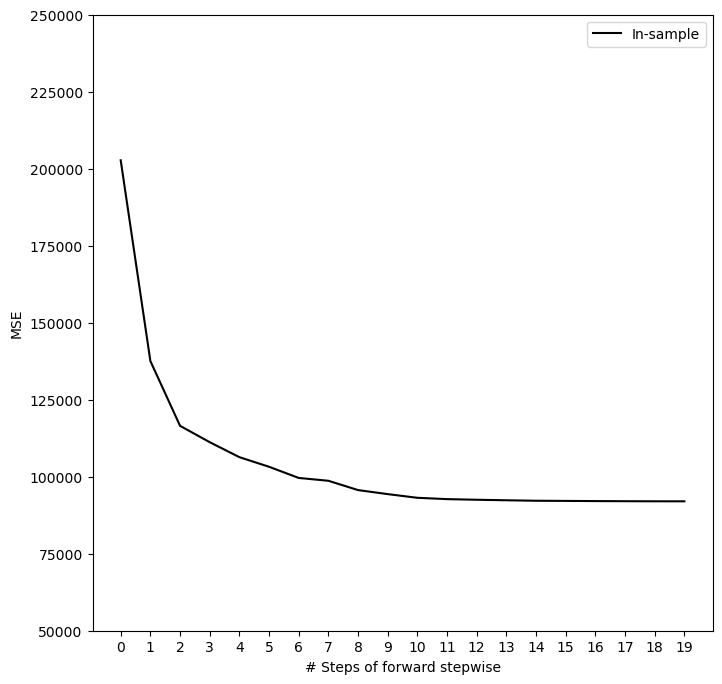

In [13]:
mse_fig, ax = plt.subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
# Y[:,None] is to make it a column vector.
# mean(0) is to average over the rows.
n_steps = insample_mse.shape[0] # Number of steps is 20
ax.plot(np.arange(n_steps), # from 0 to 19
        insample_mse, # insample MSE
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE'); ax.set_xlabel('# Steps of forward stepwise')
ax.set_ylim([50000,250000]); ax.set_xticks(range(20)); ax.legend();

## Choosing Among Models Using the Cross-Validation
- We perform 5-fold cross-validation for each model along the path.
- We use `cross_val_predict()` of `sklearn.model_selection` to calculate the fitted values for a model of each step.
    - `cross_val_predict()` uses the training data of remaning folds to fit the model and calculate the fitted values for the excluded fold.
        1. The first fold is excluded and the model is fit on the remaining 4 folds.
        2. The fitted values are calculated for the first fold.
        3. The process is repeated for the remaining folds.
        - In the end, we have 5 sets of fitted values for a model of each step. The total number of fitted values for a model of each step is 263.
- The result is also a list of 263 fitted values for 20 models along the path.

In [15]:
K = 5
kfold = skm.KFold(K, shuffle=True, random_state=0)
Yhat_cv = skm.cross_val_predict(full_path, Hitters, Y, cv=kfold)
Yhat_cv.shape

(263, 20)

- For each model along the path, we compute the MSE in each cross-validation fold. It means we have 5 MSEs for each model.
- We calculate the mean and variance of the 5 MSEs for each model.
- The variance estimates is rough because the training sets overlap. It means that the errors aren't independent.
- First, we need the indices of the training and test sets for each fold. We use `split()` method of `kfold` to get the indices.
- Because we use a fix random_state, the indices are the same for 20 models.

In [16]:
# Show shape of each train and test set for each fold
for train_idx, test_idx in kfold.split(Y):
    print(train_idx.shape, test_idx.shape)
    print(test_idx[:3])

(210,) (53,)
[5 7 8]
(210,) (53,)
[ 3  4 13]
(210,) (53,)
[ 0  2 10]
(211,) (52,)
[ 1  6 11]
(211,) (52,)
[ 9 21 25]


In [17]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx, None])**2
    # Y[test_idx, None] is to make it a column vector.
    cv_mse.append(errors.mean(0))
    # mean(0) is to average over the rows.
cv_mse

[array([297431.06375465, 179409.9479167 , 169081.87136598, 161065.23003134,
        143343.94710477, 136980.48787987, 133308.92200721, 131281.92026823,
        123424.15486916, 122703.80987915, 125273.80434187, 127445.03843963,
        127856.74842777, 129173.2015285 , 129795.62564573, 123488.24024446,
        126038.61444479, 127633.64608344, 128992.90502241, 129058.63649627]),
 array([213373.26684906, 171503.22142442, 149740.51439506, 158039.08094899,
        136954.50569394, 126681.57443205, 132669.47624458, 172481.81312871,
        177296.93538742, 170634.1192835 , 158830.79378516, 165893.21561513,
        152772.31322782, 155531.09576055, 148106.82726264, 150350.87095364,
        147588.52245651, 147698.76647949, 147679.90672549, 147916.51695233]),
 array([164217.86614576, 119051.86818073, 106610.80755337, 109849.16390754,
         97833.92005879, 109241.85546727, 102674.2023572 ,  95998.89718102,
         99621.93621648, 104603.25122781, 108773.32323463, 106275.21727878,
        

- We draw a plot of the mean MSE against the number of variables in each model.
- We also plot the standard error of the mean MSE against the number of variables in each model.
    - $Std(mean) = \frac{Std}{\sqrt{K}}$

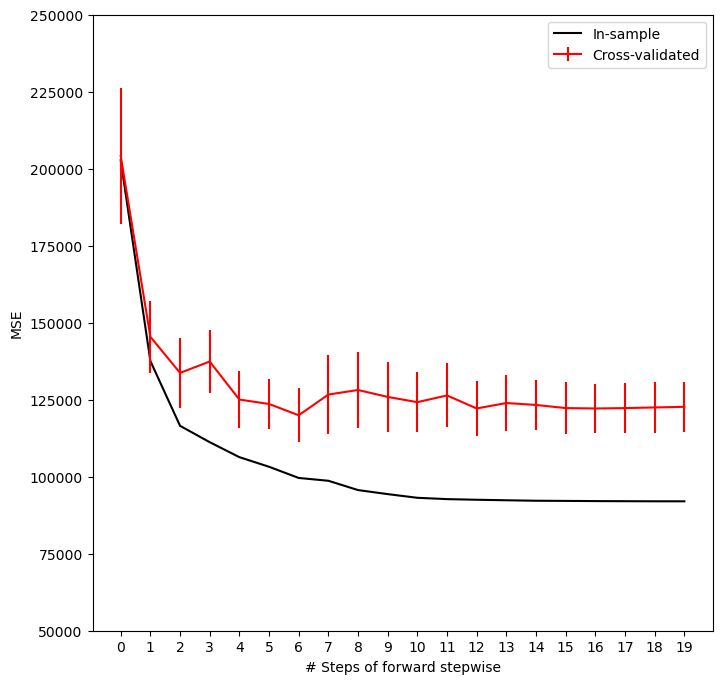

In [18]:
# Draw the figure
ax.errorbar(x = np.arange(n_steps), # n_steps=20
            y = np.mean(cv_mse, axis=0),
            yerr = np.std(cv_mse, axis=0) / np.sqrt(K),
            label = 'Cross-validated',
            c = 'r') # color red
ax.set_ylim([50000,250000]); ax.legend(); mse_fig

## Choosing Among Models Using the Validation Set Approach
- We use `skm.ShuffleSplit()` to split the data into training (80% = 210) and test set (20% = 53).

In [19]:
# Split the data into the training and validation set
validation = skm.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# Get indices of the training and test set
# train_idx, test_idx = list(validation.split(Y))[0]
for train_idx, test_idx in validation.split(Y):
    train_idx = train_idx
    test_idx = test_idx

- We fit the model for each step along the path on the training set.
- We predict the response on the validation set.
- The result is a list of 53 predicted values for each 20 models.

In [20]:
# Define the strategy
strategy = Stepwise.fixed_steps(model_spec=design, n_steps=len(design.terms), direction='forward')
# Fit the models on the training set
full_path = sklearn_selection_path(sm.OLS, strategy)
full_path.fit(Hitters.iloc[train_idx], Y[train_idx])
# Predict values on the validation set
Yhat_val = full_path.predict(Hitters.iloc[test_idx])
Yhat_val.shape

(53, 20)

- Based on the predicted values, we calculate the MSE for each model.

In [21]:
errors = (Yhat_val - Y[test_idx, None])**2
print('errors shape:', errors.shape)
validation_mse = errors.mean(0)
# mean(0) is to average over the rows.
print('validation_mse shape:', validation_mse.shape)

errors shape: (53, 20)
validation_mse shape: (20,)


- We plot the MSE against the number of variables in each model.

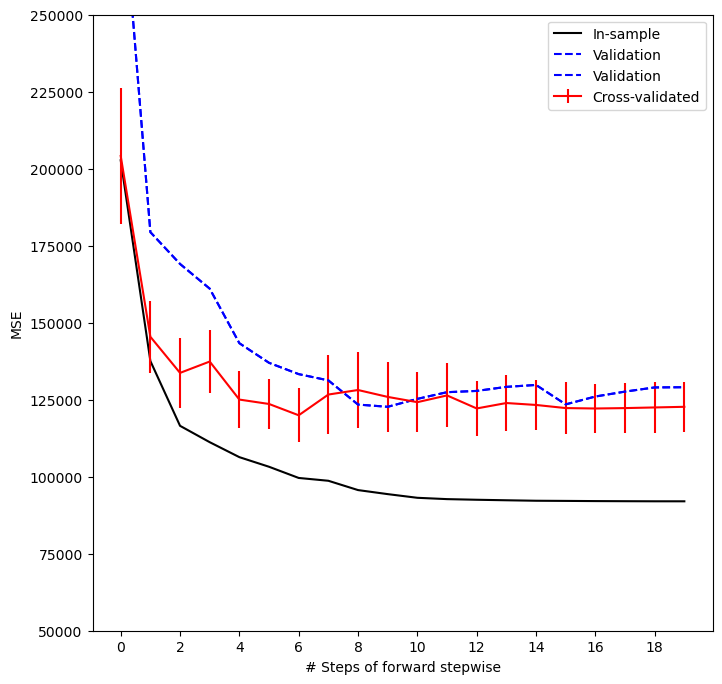

In [23]:
ax.plot(np.arange(n_steps), # n_steps=20
        validation_mse,
        'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2]); ax.set_ylim([50000,250000]); ax.legend(); mse_fig

## Best Subset Selection
- Forward stepwise selection is a *greedy* method that adds one variable at a time to the model.
- Now, we apply best subset selection to the `Hitters` data, where the best predictor set is chosen for each subset size.
- We use `fit_path` of `l0bnb` for best subset selection.
    - Instead of fixing the subset size, this package treats subset size as a penalty, creating a path of solutions. This difference affects how we handle cross-validation.
- First, we define the design matrix `X` without the intercept.

In [24]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

- The `fit_path()` function returns a list with the fitted coefficients (`B`), the intercept (`B0`) and other details.

In [25]:
path = fit_path(X, Y, max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


- We look at the model at step 4.

In [26]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555505,
 'lambda_0': 0.011416248027450207,
 'M': 0.5829861733382011,
 'Time_exceeded': False}

- At the fourth step, `'B'` has two nonzero coefficients with a penalty `lambda_0` of $0.114$.
- Predictions can be made on a validation set based on `lambda_0` or via cross-validation.